# Perbandingan Algoritma ML dan FS untuk Identifikasi Penyakit Alzheimer

## Prbolem Statement
Alzheimer merupakan penyakit neurodegeneratif yang progresif, ditandai dengan penurunan fungsi kognitif, kehilangan ingatan, dan disorientasi. Identifikasi dini penyakit Alzheimer sangat penting untuk manajemen dan perawatan pasien, namun deteksi pada tahap awal seringkali sulit karena gejala yang cenderung samar. Saat ini, berbagai algoritma machine learning (ML) dan teknik feature selection (FS) digunakan dalam mendukung identifikasi dan diagnosis penyakit ini.

## Project Objective
Project ini bertujuan untuk membandingkan kinerja berbagai algoritma machine learning serta teknik feature selection dalam mengidentifikasi Alzheimer. Perbandingan ini akan fokus pada evaluation metrics seperti accuracy. Algoritma ML yang akan dievaluasi meliputi metode supervised learning seperti Decision Trees (DT), Random Forest (RF), Support Vector Machines (SVM), dan Artificial Neural Networks (ANN). Teknik feature selection seperti Mutual Information (MI), Recursive Feature Elimination (RFE) dan Chi2 (Chi-Square).

## Relevansi
Dengan memanfaatkan teknologi ini, diharapkan mampu meningkatkan kemampuan deteksi dini Alzheimer melalui data medis.

## Paper References
- [Alzheimer’s Disease Diagnosis Using Machine Learning: A Survey](https://www.mdpi.com/2076-3417/13/14/8298)
- [Alzheimer’s disease prediction using machine learning techniques and principal component analysis (PCA)](https://doi.org/10.1016/j.matpr.2021.03.061)
- [A systematic review on machine learning and deep learning techniques in the effective diagnosis of Alzheimer’s disease](https://doi.org/10.1186/s40708-023-00195-7)
- [Genetic algorithm with logistic regression feature selection for Alzheimer’s disease classification](https://doi.org/10.1007/s00521-020-05596-x)
- [Machine Learning for Dementia Prediction: A Systematic Review and Future Research Directions](https://doi.org/10.1007/s10916-023-01906-7)

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d rabieelkharoua/alzheimers-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/268k [00:00<?, ?B/s]
100% 268k/268k [00:00<00:00, 53.8MB/s]


In [3]:
!unzip -q alzheimers-disease-dataset.zip -d '/content'

## Dataset

Dataset yang digunakan adalah [alzheimer-disease-dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset) dari kaggle.

In [4]:
import pandas as pd

df = pd.read_csv('/content/alzheimers_disease_data.csv')
# Delete PatientID and DoctorInCharge
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [5]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values in each column
df.isnull().sum()

# Get the data types of each column
# df.dtypes

# Get the number of unique values in each column
# df.nunique()

# Get the correlation matrix of the dataset
# df.corr()

# Visualize the distribution of a specific column
# df['Gender'].hist()

# Group the data by a specific column and calculate the mean of another column
# df.groupby('column_name')['target_column'].mean()


,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


## Prepocessing

Agar data siap digunakan untuk algoritma machine learning, harus dilakukan pra-premrosesan data seperti mengubah data kategori dengan one hot encoding, mengubah data numerical dengan standardscaler agar skala nilainya sama.

In [7]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical df
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Feature Selection & Training

Menggunakan algoritma feature selection seperti MI dan RFE untuk mendapatkan fitur paling relevan berdasarkan nilai target.

In [8]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def select_features_mi(X, y):
    mi = mutual_info_classif(X, y)
    return X[:, mi > 0]

def select_features_rfe(estimator, X, y, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    X_rfe = rfe.fit_transform(X, y)
    return X_rfe, rfe.support_

X_train_mi = select_features_mi(X_train, y_train)
X_test_mi = X_test[:, mutual_info_classif(X_train, y_train) > 0]

estimator = RandomForestClassifier(random_state=42)
X_train_rfe, rfe_support = select_features_rfe(estimator, X_train, y_train, n_features_to_select=10)
X_test_rfe = X_test[:, rfe_support]

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42)
}

def evaluate_models(X, y, models):
    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        results[name] = scores.mean()
    return results

original_results = evaluate_models(X_train, y_train, models)

# Evaluate models with MI selected features
mi_results = evaluate_models(X_train_mi, y_train, models)

# Evaluate models with RFE selected features
rfe_results = evaluate_models(X_train_rfe, y_train, models)

original_results, mi_results, rfe_results


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

({'SVM': 0.83709743033426,
  'KNN': 0.7323903315479016,
  'Random Forest': 0.9272781205505458,
  'Decision Tree': 0.9016831649603363,
  'ANN': 0.8190707844599634},
 {'SVM': 0.8504729134178588,
  'KNN': 0.7649603362939861,
  'Random Forest': 0.9365821411621127,
  'Decision Tree': 0.8964489117906298,
  'ANN': 0.8458353108685334},
 {'SVM': 0.8778188351752663,
  'KNN': 0.855715641738423,
  'Random Forest': 0.9453047664248423,
  'Decision Tree': 0.8888941623160893,
  'ANN': 0.8743219879313852})

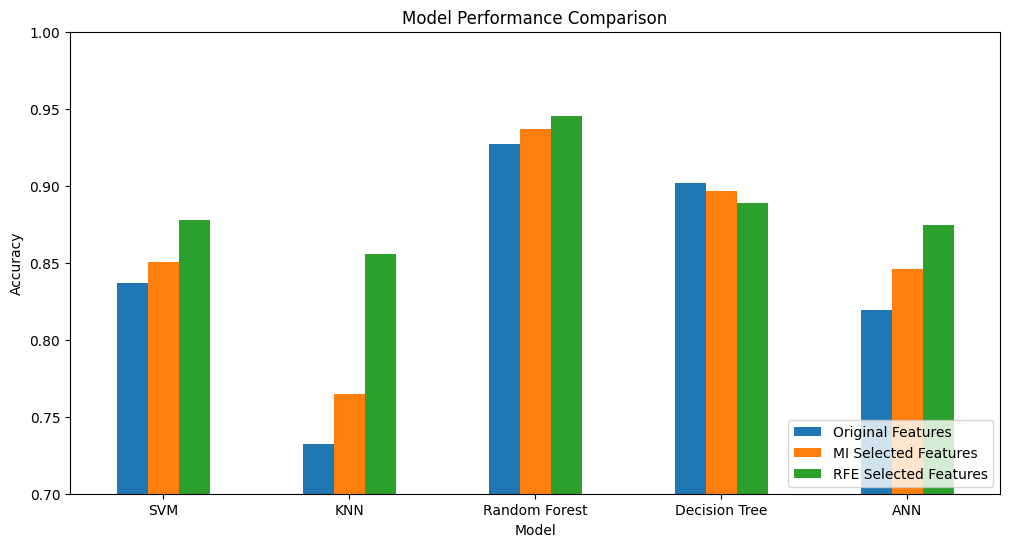

In [9]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Original Features': original_results,
    'MI Selected Features': mi_results,
    'RFE Selected Features': rfe_results
})

# Plot the results
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()


## Kesimpulan Sementara

Berdasarkan hasil training model dan implementasi feature selection, algoritma classifier Random Forest dengan RFE FS mendapatkan akurasi paling tinggi yaitu 94%. Diikuti oleh MI sekitar 93%.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

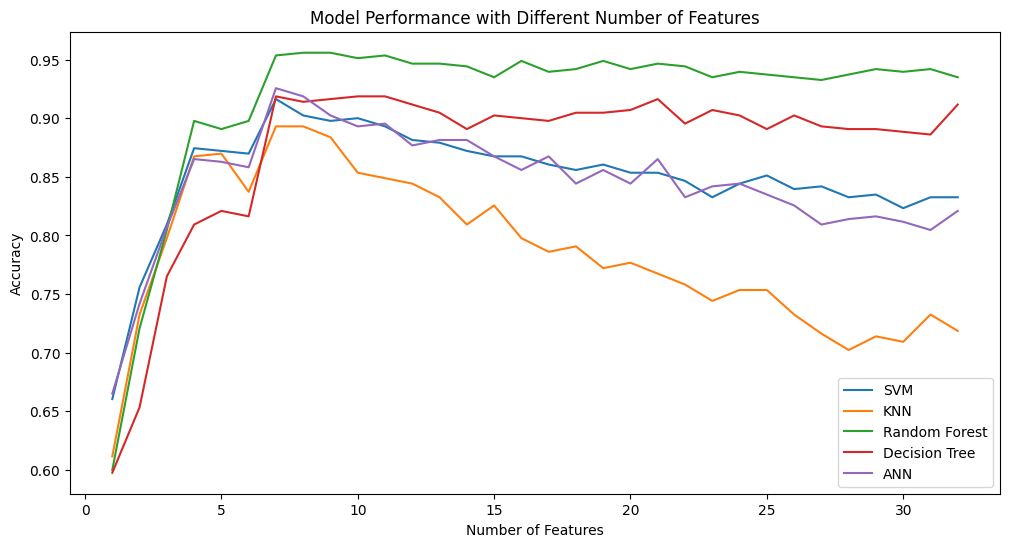

In [10]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

# Mengurutkan fitur berdasarkan kepentingannya menggunakan Mutual Information
feature_importances = mutual_info_classif(X_train, y_train)
sorted_idx = np.argsort(feature_importances)[::-1]

# Fungsi untuk mengevaluasi model dengan berbagai jumlah fitur
def evaluate_with_different_features(models, X_train, X_test, y_train, y_test, sorted_idx):
    max_features = X_train.shape[1]
    results = {name: [] for name in models}
    for i in range(1, max_features + 1):
        selected_features = sorted_idx[:i]
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]
        for name, model in models.items():
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)
            results[name].append(accuracy)
    return results

# List of models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42)
}

# Evaluate models with different number of features
results = evaluate_with_different_features(models, X_train, X_test, y_train, y_test, sorted_idx)

# Plot the results
plt.figure(figsize=(12, 6))
for model in results:
    plt.plot(range(1, len(results[model]) + 1), results[model], label=model)

plt.title('Model Performance with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Dalam klasifikasi berdasarkan jumlah fitur, algoritma Random Forest lebih unggul daripada algoritma lainnya, hanya dengan 5 fitur, algoritma Random forest mampu mendapatkan akurasi > 95%.

Feature Selection: Mutual Information, Model: SVM, Number of Features: 1, Accuracy: 0.6605
Feature Selection: Mutual Information, Model: KNN, Number of Features: 1, Accuracy: 0.6116
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 1, Accuracy: 0.6000
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 1, Accuracy: 0.5977
Feature Selection: Mutual Information, Model: ANN, Number of Features: 1, Accuracy: 0.6651
Feature Selection: Mutual Information, Model: SVM, Number of Features: 2, Accuracy: 0.7558
Feature Selection: Mutual Information, Model: KNN, Number of Features: 2, Accuracy: 0.7326
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 2, Accuracy: 0.7209
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 2, Accuracy: 0.6535
Feature Selection: Mutual Information, Model: ANN, Number of Features: 2, Accuracy: 0.7488
Feature Selection: Mutual Information, Model: SVM,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 3, Accuracy: 0.8140
Feature Selection: Mutual Information, Model: SVM, Number of Features: 4, Accuracy: 0.8744
Feature Selection: Mutual Information, Model: KNN, Number of Features: 4, Accuracy: 0.8674
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 4, Accuracy: 0.8977
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 4, Accuracy: 0.8093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 4, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: SVM, Number of Features: 5, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: KNN, Number of Features: 5, Accuracy: 0.8698
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 5, Accuracy: 0.8907
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 5, Accuracy: 0.8209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 5, Accuracy: 0.8698
Feature Selection: Mutual Information, Model: SVM, Number of Features: 6, Accuracy: 0.9186
Feature Selection: Mutual Information, Model: KNN, Number of Features: 6, Accuracy: 0.9163
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 6, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 6, Accuracy: 0.9256


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 6, Accuracy: 0.9395
Feature Selection: Mutual Information, Model: SVM, Number of Features: 7, Accuracy: 0.9140
Feature Selection: Mutual Information, Model: KNN, Number of Features: 7, Accuracy: 0.9000
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 7, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 7, Accuracy: 0.9209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 7, Accuracy: 0.9279
Feature Selection: Mutual Information, Model: SVM, Number of Features: 8, Accuracy: 0.9047
Feature Selection: Mutual Information, Model: KNN, Number of Features: 8, Accuracy: 0.8884
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 8, Accuracy: 0.9558
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 8, Accuracy: 0.9233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 8, Accuracy: 0.9163
Feature Selection: Mutual Information, Model: SVM, Number of Features: 9, Accuracy: 0.8930
Feature Selection: Mutual Information, Model: KNN, Number of Features: 9, Accuracy: 0.8698
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 9, Accuracy: 0.9558
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 9, Accuracy: 0.9140


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 9, Accuracy: 0.9233
Feature Selection: Mutual Information, Model: SVM, Number of Features: 10, Accuracy: 0.8837
Feature Selection: Mutual Information, Model: KNN, Number of Features: 10, Accuracy: 0.8674
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 10, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 10, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 10, Accuracy: 0.8907
Feature Selection: Mutual Information, Model: SVM, Number of Features: 11, Accuracy: 0.8884
Feature Selection: Mutual Information, Model: KNN, Number of Features: 11, Accuracy: 0.8442
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 11, Accuracy: 0.9488
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 11, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 11, Accuracy: 0.9000
Feature Selection: Mutual Information, Model: SVM, Number of Features: 12, Accuracy: 0.8837
Feature Selection: Mutual Information, Model: KNN, Number of Features: 12, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 12, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 12, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 12, Accuracy: 0.8930
Feature Selection: Mutual Information, Model: SVM, Number of Features: 13, Accuracy: 0.8767
Feature Selection: Mutual Information, Model: KNN, Number of Features: 13, Accuracy: 0.8209
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 13, Accuracy: 0.9488
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 13, Accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 13, Accuracy: 0.8767
Feature Selection: Mutual Information, Model: SVM, Number of Features: 14, Accuracy: 0.8744
Feature Selection: Mutual Information, Model: KNN, Number of Features: 14, Accuracy: 0.8256
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 14, Accuracy: 0.9442
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 14, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 14, Accuracy: 0.8767
Feature Selection: Mutual Information, Model: SVM, Number of Features: 15, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: KNN, Number of Features: 15, Accuracy: 0.8140
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 15, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 15, Accuracy: 0.9070


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 15, Accuracy: 0.8767
Feature Selection: Mutual Information, Model: SVM, Number of Features: 16, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: KNN, Number of Features: 16, Accuracy: 0.8116
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 16, Accuracy: 0.9488
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 16, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 16, Accuracy: 0.8744
Feature Selection: Mutual Information, Model: SVM, Number of Features: 17, Accuracy: 0.8651
Feature Selection: Mutual Information, Model: KNN, Number of Features: 17, Accuracy: 0.8140
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 17, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 17, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 17, Accuracy: 0.8535
Feature Selection: Mutual Information, Model: SVM, Number of Features: 18, Accuracy: 0.8674
Feature Selection: Mutual Information, Model: KNN, Number of Features: 18, Accuracy: 0.8140
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 18, Accuracy: 0.9442
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 18, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 18, Accuracy: 0.8791
Feature Selection: Mutual Information, Model: SVM, Number of Features: 19, Accuracy: 0.8605
Feature Selection: Mutual Information, Model: KNN, Number of Features: 19, Accuracy: 0.7814
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 19, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 19, Accuracy: 0.8930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 19, Accuracy: 0.8535
Feature Selection: Mutual Information, Model: SVM, Number of Features: 20, Accuracy: 0.8581
Feature Selection: Mutual Information, Model: KNN, Number of Features: 20, Accuracy: 0.7674
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 20, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 20, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 20, Accuracy: 0.8628
Feature Selection: Mutual Information, Model: SVM, Number of Features: 21, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: KNN, Number of Features: 21, Accuracy: 0.7605
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 21, Accuracy: 0.9395
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 21, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 21, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: SVM, Number of Features: 22, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: KNN, Number of Features: 22, Accuracy: 0.7721
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 22, Accuracy: 0.9349
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 22, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 22, Accuracy: 0.8465
Feature Selection: Mutual Information, Model: SVM, Number of Features: 23, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: KNN, Number of Features: 23, Accuracy: 0.7605
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 23, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 23, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 23, Accuracy: 0.8581
Feature Selection: Mutual Information, Model: SVM, Number of Features: 24, Accuracy: 0.8442
Feature Selection: Mutual Information, Model: KNN, Number of Features: 24, Accuracy: 0.7372
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 24, Accuracy: 0.9442
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 24, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 24, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: SVM, Number of Features: 25, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: KNN, Number of Features: 25, Accuracy: 0.7465
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 25, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 25, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 25, Accuracy: 0.8372
Feature Selection: Mutual Information, Model: SVM, Number of Features: 26, Accuracy: 0.8372
Feature Selection: Mutual Information, Model: KNN, Number of Features: 26, Accuracy: 0.7349
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 26, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 26, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 26, Accuracy: 0.8302
Feature Selection: Mutual Information, Model: SVM, Number of Features: 27, Accuracy: 0.8395
Feature Selection: Mutual Information, Model: KNN, Number of Features: 27, Accuracy: 0.7465
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 27, Accuracy: 0.9465
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 27, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 27, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: SVM, Number of Features: 28, Accuracy: 0.8395
Feature Selection: Mutual Information, Model: KNN, Number of Features: 28, Accuracy: 0.7233
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 28, Accuracy: 0.9395
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 28, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 28, Accuracy: 0.8302
Feature Selection: Mutual Information, Model: SVM, Number of Features: 29, Accuracy: 0.8372
Feature Selection: Mutual Information, Model: KNN, Number of Features: 29, Accuracy: 0.7186
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 29, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 29, Accuracy: 0.8953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 29, Accuracy: 0.8233
Feature Selection: Mutual Information, Model: SVM, Number of Features: 30, Accuracy: 0.8326
Feature Selection: Mutual Information, Model: KNN, Number of Features: 30, Accuracy: 0.7326
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 30, Accuracy: 0.9302
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 30, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 30, Accuracy: 0.8000
Feature Selection: Mutual Information, Model: SVM, Number of Features: 31, Accuracy: 0.8326
Feature Selection: Mutual Information, Model: KNN, Number of Features: 31, Accuracy: 0.7326
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 31, Accuracy: 0.9349
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 31, Accuracy: 0.8930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 31, Accuracy: 0.7907
Feature Selection: Mutual Information, Model: SVM, Number of Features: 32, Accuracy: 0.8326
Feature Selection: Mutual Information, Model: KNN, Number of Features: 32, Accuracy: 0.7186
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 32, Accuracy: 0.9233
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 32, Accuracy: 0.8860


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 32, Accuracy: 0.8047
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 1, Accuracy: 0.5395
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 2, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 2, Accuracy: 0.5163
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 2, Accuracy: 0.6395
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 2, Accuracy: 0.6465
Feature Selection: RFE (Random Forest), 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 6, Accuracy: 0.6837
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 7, Accuracy: 0.7442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 7, Accuracy: 0.7047
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 7, Accuracy: 0.7279
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 7, Accuracy: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 7, Accuracy: 0.7326
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 8, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 8, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 8, Accuracy: 0.8023
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 8, Accuracy: 0.7744


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 8, Accuracy: 0.7674
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 9, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 9, Accuracy: 0.7674
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 9, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 9, Accuracy: 0.7512


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 9, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 10, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 10, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 10, Accuracy: 0.8000
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 10, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 10, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 11, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 11, Accuracy: 0.7698
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 11, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 11, Accuracy: 0.7326


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 11, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 12, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 12, Accuracy: 0.7349
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 12, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 12, Accuracy: 0.7744


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 12, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 13, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 13, Accuracy: 0.7628
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 13, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 13, Accuracy: 0.7605


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 13, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 14, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 14, Accuracy: 0.7605
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 14, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 14, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 14, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 15, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 15, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 15, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 15, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 15, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 16, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 16, Accuracy: 0.7419
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 16, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 16, Accuracy: 0.7465


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 16, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 17, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 17, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 17, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 17, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 17, Accuracy: 0.7605
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 18, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 18, Accuracy: 0.7326
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 18, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 18, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 18, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 19, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 19, Accuracy: 0.7140
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 19, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 19, Accuracy: 0.7674


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 19, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 20, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 20, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 20, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 20, Accuracy: 0.7651


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 20, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 21, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 21, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 21, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 21, Accuracy: 0.7442


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 21, Accuracy: 0.7372
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 22, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 22, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 22, Accuracy: 0.8047
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 22, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 22, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 23, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 23, Accuracy: 0.6930
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 23, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 23, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 23, Accuracy: 0.7419
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 24, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 24, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 24, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 24, Accuracy: 0.7140


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 24, Accuracy: 0.7349
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 25, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 25, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 25, Accuracy: 0.8093
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 25, Accuracy: 0.7209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 25, Accuracy: 0.7372
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 26, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 26, Accuracy: 0.6814
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 26, Accuracy: 0.8000
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 26, Accuracy: 0.7419


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 26, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 27, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 27, Accuracy: 0.6837
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 27, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 27, Accuracy: 0.7302


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 27, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 28, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 28, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 28, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 28, Accuracy: 0.7233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 28, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 29, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 29, Accuracy: 0.6767
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 29, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 29, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 29, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 30, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 30, Accuracy: 0.6791
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 30, Accuracy: 0.7651
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 30, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 30, Accuracy: 0.7442
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 31, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 31, Accuracy: 0.6605
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 31, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 31, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 31, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 32, Accuracy: 0.8326
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 32, Accuracy: 0.7186
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 32, Accuracy: 0.9256
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 32, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 32, Accuracy: 0.7977


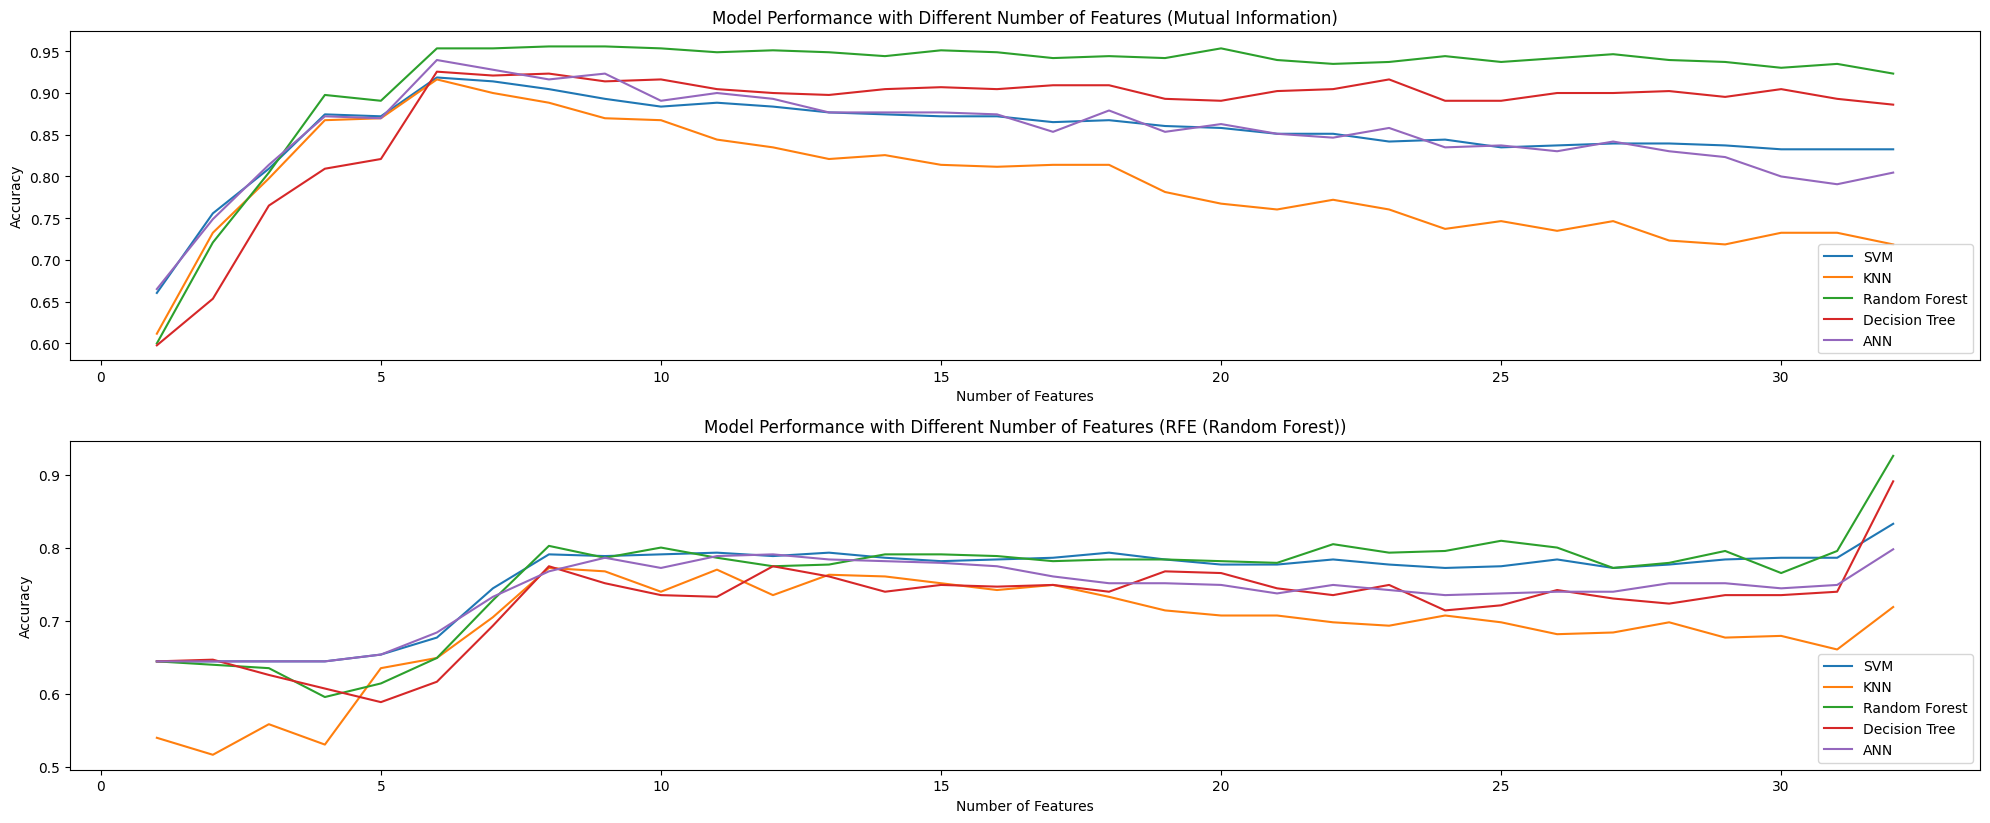

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Load and preprocess data
file_path = '/content/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['PatientID', 'DoctorInCharge'])

X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

feature_selectors = {
    "Mutual Information": mutual_info_classif,
    # "Chi-Square": chi2,
    "RFE (Random Forest)": RandomForestClassifier(random_state=42)
}

classifiers = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42, max_iter=300)
}

# Evaluate models with different feature selection methods and different numbers of features
results = {}
for fs_name, fs_algo in feature_selectors.items():
    results[fs_name] = {name: [] for name in classifiers}
    if fs_name == "RFE (Random Forest)":
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=fs_algo, n_features_to_select=1)
        selector.fit(X_train, y_train)
        sorted_idx = selector.support_.argsort()
    else:
        selector = SelectKBest(score_func=fs_algo, k='all')
        selector.fit(X_train, y_train)
        sorted_idx = selector.scores_.argsort()[::-1]

    for i in range(1, X_train.shape[1] + 1):
        selected_features = sorted_idx[:i]
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]

        for name, model in classifiers.items():
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)
            results[fs_name][name].append(accuracy)
            print(f'Feature Selection: {fs_name}, Model: {name}, Number of Features: {i}, Accuracy: {accuracy:.4f}')

# Plot the results
plt.figure(figsize=(20, 12))
for fs_name, fs_results in results.items():
    plt.subplot(3, 1, list(results.keys()).index(fs_name) + 1)
    for model in fs_results:
        plt.plot(range(1, len(fs_results[model]) + 1), fs_results[model], label=model)
    plt.title(f'Model Performance with Different Number of Features ({fs_name})')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


Ketika Algoritma Classifier digabungkan dengan algoritma Feature Selection berdasarkan jumlah fitur, algoritma Random Forest dengan Mutul Information lebih unggul dibanding algoritma lainnya.

Feature Selection: Mutual Information, Model: SVM, Number of Features: 1, Accuracy: 0.6605
Feature Selection: Mutual Information, Model: KNN, Number of Features: 1, Accuracy: 0.6116
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 1, Accuracy: 0.6000
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 1, Accuracy: 0.5977
Feature Selection: Mutual Information, Model: ANN, Number of Features: 1, Accuracy: 0.6651
Feature Selection: Mutual Information, Model: SVM, Number of Features: 2, Accuracy: 0.7558
Feature Selection: Mutual Information, Model: KNN, Number of Features: 2, Accuracy: 0.7326
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 2, Accuracy: 0.7209
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 2, Accuracy: 0.6535
Feature Selection: Mutual Information, Model: ANN, Number of Features: 2, Accuracy: 0.7488
Feature Selection: Mutual Information, Model: SVM,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 3, Accuracy: 0.8140
Feature Selection: Mutual Information, Model: SVM, Number of Features: 4, Accuracy: 0.8744
Feature Selection: Mutual Information, Model: KNN, Number of Features: 4, Accuracy: 0.8674
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 4, Accuracy: 0.8977
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 4, Accuracy: 0.8093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 4, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: SVM, Number of Features: 5, Accuracy: 0.9233
Feature Selection: Mutual Information, Model: KNN, Number of Features: 5, Accuracy: 0.9163
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 5, Accuracy: 0.9558
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 5, Accuracy: 0.8953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 5, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: SVM, Number of Features: 6, Accuracy: 0.9116
Feature Selection: Mutual Information, Model: KNN, Number of Features: 6, Accuracy: 0.9023
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 6, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 6, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 6, Accuracy: 0.9349
Feature Selection: Mutual Information, Model: SVM, Number of Features: 7, Accuracy: 0.9000
Feature Selection: Mutual Information, Model: KNN, Number of Features: 7, Accuracy: 0.8907
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 7, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 7, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 7, Accuracy: 0.9302
Feature Selection: Mutual Information, Model: SVM, Number of Features: 8, Accuracy: 0.8953
Feature Selection: Mutual Information, Model: KNN, Number of Features: 8, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 8, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 8, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 8, Accuracy: 0.9279
Feature Selection: Mutual Information, Model: SVM, Number of Features: 9, Accuracy: 0.8814
Feature Selection: Mutual Information, Model: KNN, Number of Features: 9, Accuracy: 0.8837
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 9, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 9, Accuracy: 0.9186


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 9, Accuracy: 0.9233
Feature Selection: Mutual Information, Model: SVM, Number of Features: 10, Accuracy: 0.8884
Feature Selection: Mutual Information, Model: KNN, Number of Features: 10, Accuracy: 0.8605
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 10, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 10, Accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 10, Accuracy: 0.9093
Feature Selection: Mutual Information, Model: SVM, Number of Features: 11, Accuracy: 0.8791
Feature Selection: Mutual Information, Model: KNN, Number of Features: 11, Accuracy: 0.8233
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 11, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 11, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 11, Accuracy: 0.8930
Feature Selection: Mutual Information, Model: SVM, Number of Features: 12, Accuracy: 0.8744
Feature Selection: Mutual Information, Model: KNN, Number of Features: 12, Accuracy: 0.8233
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 12, Accuracy: 0.9558
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 12, Accuracy: 0.9140


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 12, Accuracy: 0.8907
Feature Selection: Mutual Information, Model: SVM, Number of Features: 13, Accuracy: 0.8605
Feature Selection: Mutual Information, Model: KNN, Number of Features: 13, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 13, Accuracy: 0.9395
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 13, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 13, Accuracy: 0.8884
Feature Selection: Mutual Information, Model: SVM, Number of Features: 14, Accuracy: 0.8791
Feature Selection: Mutual Information, Model: KNN, Number of Features: 14, Accuracy: 0.8186
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 14, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 14, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 14, Accuracy: 0.8814
Feature Selection: Mutual Information, Model: SVM, Number of Features: 15, Accuracy: 0.8721
Feature Selection: Mutual Information, Model: KNN, Number of Features: 15, Accuracy: 0.8047
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 15, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 15, Accuracy: 0.8860


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 15, Accuracy: 0.8860
Feature Selection: Mutual Information, Model: SVM, Number of Features: 16, Accuracy: 0.8605
Feature Selection: Mutual Information, Model: KNN, Number of Features: 16, Accuracy: 0.7837
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 16, Accuracy: 0.9512
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 16, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 16, Accuracy: 0.8767
Feature Selection: Mutual Information, Model: SVM, Number of Features: 17, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: KNN, Number of Features: 17, Accuracy: 0.7744
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 17, Accuracy: 0.9535
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 17, Accuracy: 0.8953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 17, Accuracy: 0.8558
Feature Selection: Mutual Information, Model: SVM, Number of Features: 18, Accuracy: 0.8535
Feature Selection: Mutual Information, Model: KNN, Number of Features: 18, Accuracy: 0.7837
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 18, Accuracy: 0.9465
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 18, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 18, Accuracy: 0.8698
Feature Selection: Mutual Information, Model: SVM, Number of Features: 19, Accuracy: 0.8558
Feature Selection: Mutual Information, Model: KNN, Number of Features: 19, Accuracy: 0.7628
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 19, Accuracy: 0.9442
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 19, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 19, Accuracy: 0.8558
Feature Selection: Mutual Information, Model: SVM, Number of Features: 20, Accuracy: 0.8581
Feature Selection: Mutual Information, Model: KNN, Number of Features: 20, Accuracy: 0.7535
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 20, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 20, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 20, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: SVM, Number of Features: 21, Accuracy: 0.8512
Feature Selection: Mutual Information, Model: KNN, Number of Features: 21, Accuracy: 0.7512
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 21, Accuracy: 0.9442
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 21, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 21, Accuracy: 0.8535
Feature Selection: Mutual Information, Model: SVM, Number of Features: 22, Accuracy: 0.8465
Feature Selection: Mutual Information, Model: KNN, Number of Features: 22, Accuracy: 0.7558
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 22, Accuracy: 0.9488
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 22, Accuracy: 0.9116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 22, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: SVM, Number of Features: 23, Accuracy: 0.8302
Feature Selection: Mutual Information, Model: KNN, Number of Features: 23, Accuracy: 0.7442
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 23, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 23, Accuracy: 0.9070


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 23, Accuracy: 0.8116
Feature Selection: Mutual Information, Model: SVM, Number of Features: 24, Accuracy: 0.8442
Feature Selection: Mutual Information, Model: KNN, Number of Features: 24, Accuracy: 0.7465
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 24, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 24, Accuracy: 0.8884


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 24, Accuracy: 0.8395
Feature Selection: Mutual Information, Model: SVM, Number of Features: 25, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: KNN, Number of Features: 25, Accuracy: 0.7442
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 25, Accuracy: 0.9279
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 25, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 25, Accuracy: 0.8488
Feature Selection: Mutual Information, Model: SVM, Number of Features: 26, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: KNN, Number of Features: 26, Accuracy: 0.7535
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 26, Accuracy: 0.9349
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 26, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 26, Accuracy: 0.8488
Feature Selection: Mutual Information, Model: SVM, Number of Features: 27, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: KNN, Number of Features: 27, Accuracy: 0.7302
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 27, Accuracy: 0.9419
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 27, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 27, Accuracy: 0.8047
Feature Selection: Mutual Information, Model: SVM, Number of Features: 28, Accuracy: 0.8419
Feature Selection: Mutual Information, Model: KNN, Number of Features: 28, Accuracy: 0.7302
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 28, Accuracy: 0.9465
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 28, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 28, Accuracy: 0.7977
Feature Selection: Mutual Information, Model: SVM, Number of Features: 29, Accuracy: 0.8349
Feature Selection: Mutual Information, Model: KNN, Number of Features: 29, Accuracy: 0.7140
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 29, Accuracy: 0.9349
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 29, Accuracy: 0.8930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 29, Accuracy: 0.8279
Feature Selection: Mutual Information, Model: SVM, Number of Features: 30, Accuracy: 0.8233
Feature Selection: Mutual Information, Model: KNN, Number of Features: 30, Accuracy: 0.7093
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 30, Accuracy: 0.9302
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 30, Accuracy: 0.8953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 30, Accuracy: 0.8023
Feature Selection: Mutual Information, Model: SVM, Number of Features: 31, Accuracy: 0.8326
Feature Selection: Mutual Information, Model: KNN, Number of Features: 31, Accuracy: 0.7326
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 31, Accuracy: 0.9372
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 31, Accuracy: 0.8791


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 31, Accuracy: 0.8023
Feature Selection: Mutual Information, Model: SVM, Number of Features: 32, Accuracy: 0.8326
Feature Selection: Mutual Information, Model: KNN, Number of Features: 32, Accuracy: 0.7186
Feature Selection: Mutual Information, Model: Random Forest, Number of Features: 32, Accuracy: 0.9395
Feature Selection: Mutual Information, Model: Decision Tree, Number of Features: 32, Accuracy: 0.8884


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Mutual Information, Model: ANN, Number of Features: 32, Accuracy: 0.8116
Feature Selection: Chi-Square, Model: SVM, Number of Features: 1, Accuracy: 0.7163
Feature Selection: Chi-Square, Model: KNN, Number of Features: 1, Accuracy: 0.3558
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 1, Accuracy: 0.7163
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 1, Accuracy: 0.7163
Feature Selection: Chi-Square, Model: ANN, Number of Features: 1, Accuracy: 0.7163
Feature Selection: Chi-Square, Model: SVM, Number of Features: 2, Accuracy: 0.7395
Feature Selection: Chi-Square, Model: KNN, Number of Features: 2, Accuracy: 0.7163
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 2, Accuracy: 0.7395
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 2, Accuracy: 0.7395
Feature Selection: Chi-Square, Model: ANN, Number of Features: 2, Accuracy: 0.7395
Feature Selection: Chi-Square, Model: 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 4, Accuracy: 0.8140
Feature Selection: Chi-Square, Model: SVM, Number of Features: 5, Accuracy: 0.9140
Feature Selection: Chi-Square, Model: KNN, Number of Features: 5, Accuracy: 0.9163
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 5, Accuracy: 0.9581
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 5, Accuracy: 0.8953


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 5, Accuracy: 0.9000
Feature Selection: Chi-Square, Model: SVM, Number of Features: 6, Accuracy: 0.8860
Feature Selection: Chi-Square, Model: KNN, Number of Features: 6, Accuracy: 0.9093
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 6, Accuracy: 0.9488
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 6, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 6, Accuracy: 0.8977
Feature Selection: Chi-Square, Model: SVM, Number of Features: 7, Accuracy: 0.8837
Feature Selection: Chi-Square, Model: KNN, Number of Features: 7, Accuracy: 0.8907
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 7, Accuracy: 0.9488
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 7, Accuracy: 0.9070


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 7, Accuracy: 0.8930
Feature Selection: Chi-Square, Model: SVM, Number of Features: 8, Accuracy: 0.8791
Feature Selection: Chi-Square, Model: KNN, Number of Features: 8, Accuracy: 0.8744
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 8, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 8, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 8, Accuracy: 0.8791
Feature Selection: Chi-Square, Model: SVM, Number of Features: 9, Accuracy: 0.8767
Feature Selection: Chi-Square, Model: KNN, Number of Features: 9, Accuracy: 0.8674
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 9, Accuracy: 0.9558
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 9, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 9, Accuracy: 0.8907
Feature Selection: Chi-Square, Model: SVM, Number of Features: 10, Accuracy: 0.8698
Feature Selection: Chi-Square, Model: KNN, Number of Features: 10, Accuracy: 0.8628
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 10, Accuracy: 0.9535
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 10, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 10, Accuracy: 0.8814
Feature Selection: Chi-Square, Model: SVM, Number of Features: 11, Accuracy: 0.8651
Feature Selection: Chi-Square, Model: KNN, Number of Features: 11, Accuracy: 0.8512
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 11, Accuracy: 0.9488
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 11, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 11, Accuracy: 0.8791
Feature Selection: Chi-Square, Model: SVM, Number of Features: 12, Accuracy: 0.8698
Feature Selection: Chi-Square, Model: KNN, Number of Features: 12, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 12, Accuracy: 0.9488
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 12, Accuracy: 0.9256


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 12, Accuracy: 0.8744
Feature Selection: Chi-Square, Model: SVM, Number of Features: 13, Accuracy: 0.8651
Feature Selection: Chi-Square, Model: KNN, Number of Features: 13, Accuracy: 0.8209
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 13, Accuracy: 0.9442
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 13, Accuracy: 0.9116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 13, Accuracy: 0.8651
Feature Selection: Chi-Square, Model: SVM, Number of Features: 14, Accuracy: 0.8419
Feature Selection: Chi-Square, Model: KNN, Number of Features: 14, Accuracy: 0.7767
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 14, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 14, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 14, Accuracy: 0.8744
Feature Selection: Chi-Square, Model: SVM, Number of Features: 15, Accuracy: 0.8326
Feature Selection: Chi-Square, Model: KNN, Number of Features: 15, Accuracy: 0.7860
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 15, Accuracy: 0.9512
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 15, Accuracy: 0.9233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 15, Accuracy: 0.8535
Feature Selection: Chi-Square, Model: SVM, Number of Features: 16, Accuracy: 0.8395
Feature Selection: Chi-Square, Model: KNN, Number of Features: 16, Accuracy: 0.7930
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 16, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 16, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 16, Accuracy: 0.8674
Feature Selection: Chi-Square, Model: SVM, Number of Features: 17, Accuracy: 0.8302
Feature Selection: Chi-Square, Model: KNN, Number of Features: 17, Accuracy: 0.7651
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 17, Accuracy: 0.9488
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 17, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 17, Accuracy: 0.8651
Feature Selection: Chi-Square, Model: SVM, Number of Features: 18, Accuracy: 0.8326
Feature Selection: Chi-Square, Model: KNN, Number of Features: 18, Accuracy: 0.7744
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 18, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 18, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 18, Accuracy: 0.8535
Feature Selection: Chi-Square, Model: SVM, Number of Features: 19, Accuracy: 0.8372
Feature Selection: Chi-Square, Model: KNN, Number of Features: 19, Accuracy: 0.7442
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 19, Accuracy: 0.9419
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 19, Accuracy: 0.9163


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 19, Accuracy: 0.8674
Feature Selection: Chi-Square, Model: SVM, Number of Features: 20, Accuracy: 0.8349
Feature Selection: Chi-Square, Model: KNN, Number of Features: 20, Accuracy: 0.7558
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 20, Accuracy: 0.9419
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 20, Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 20, Accuracy: 0.8395
Feature Selection: Chi-Square, Model: SVM, Number of Features: 21, Accuracy: 0.8302
Feature Selection: Chi-Square, Model: KNN, Number of Features: 21, Accuracy: 0.7558
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 21, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 21, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 21, Accuracy: 0.8442
Feature Selection: Chi-Square, Model: SVM, Number of Features: 22, Accuracy: 0.8349
Feature Selection: Chi-Square, Model: KNN, Number of Features: 22, Accuracy: 0.7419
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 22, Accuracy: 0.9395
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 22, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 22, Accuracy: 0.8488
Feature Selection: Chi-Square, Model: SVM, Number of Features: 23, Accuracy: 0.8256
Feature Selection: Chi-Square, Model: KNN, Number of Features: 23, Accuracy: 0.7419
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 23, Accuracy: 0.9326
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 23, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 23, Accuracy: 0.8140
Feature Selection: Chi-Square, Model: SVM, Number of Features: 24, Accuracy: 0.8279
Feature Selection: Chi-Square, Model: KNN, Number of Features: 24, Accuracy: 0.7326
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 24, Accuracy: 0.9302
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 24, Accuracy: 0.8930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 24, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: SVM, Number of Features: 25, Accuracy: 0.8349
Feature Selection: Chi-Square, Model: KNN, Number of Features: 25, Accuracy: 0.7605
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 25, Accuracy: 0.9326
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 25, Accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 25, Accuracy: 0.8442
Feature Selection: Chi-Square, Model: SVM, Number of Features: 26, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: KNN, Number of Features: 26, Accuracy: 0.7442
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 26, Accuracy: 0.9465
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 26, Accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 26, Accuracy: 0.8372
Feature Selection: Chi-Square, Model: SVM, Number of Features: 27, Accuracy: 0.8326
Feature Selection: Chi-Square, Model: KNN, Number of Features: 27, Accuracy: 0.7465
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 27, Accuracy: 0.9372
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 27, Accuracy: 0.9000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 27, Accuracy: 0.8116
Feature Selection: Chi-Square, Model: SVM, Number of Features: 28, Accuracy: 0.8372
Feature Selection: Chi-Square, Model: KNN, Number of Features: 28, Accuracy: 0.7186
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 28, Accuracy: 0.9326
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 28, Accuracy: 0.9093


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 28, Accuracy: 0.8209
Feature Selection: Chi-Square, Model: SVM, Number of Features: 29, Accuracy: 0.8442
Feature Selection: Chi-Square, Model: KNN, Number of Features: 29, Accuracy: 0.7326
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 29, Accuracy: 0.9419
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 29, Accuracy: 0.9023


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 29, Accuracy: 0.8256
Feature Selection: Chi-Square, Model: SVM, Number of Features: 30, Accuracy: 0.8302
Feature Selection: Chi-Square, Model: KNN, Number of Features: 30, Accuracy: 0.7093
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 30, Accuracy: 0.9326
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 30, Accuracy: 0.9070


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 30, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: SVM, Number of Features: 31, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: KNN, Number of Features: 31, Accuracy: 0.6953
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 31, Accuracy: 0.9279
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 31, Accuracy: 0.9116


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 31, Accuracy: 0.8186
Feature Selection: Chi-Square, Model: SVM, Number of Features: 32, Accuracy: 0.8233
Feature Selection: Chi-Square, Model: KNN, Number of Features: 32, Accuracy: 0.6930
Feature Selection: Chi-Square, Model: Random Forest, Number of Features: 32, Accuracy: 0.9186
Feature Selection: Chi-Square, Model: Decision Tree, Number of Features: 32, Accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: Chi-Square, Model: ANN, Number of Features: 32, Accuracy: 0.8326
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 1, Accuracy: 0.5395
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 1, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 2, Accuracy: 0.6442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 2, Accuracy: 0.5163
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 2, Accuracy: 0.6395
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 2, Accuracy: 0.6465
Feature Selection: RFE (Random Forest), Model: A

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 6, Accuracy: 0.6837
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 7, Accuracy: 0.7442
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 7, Accuracy: 0.7047
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 7, Accuracy: 0.7279
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 7, Accuracy: 0.6930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 7, Accuracy: 0.7326
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 8, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 8, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 8, Accuracy: 0.8023
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 8, Accuracy: 0.7744


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 8, Accuracy: 0.7674
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 9, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 9, Accuracy: 0.7674
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 9, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 9, Accuracy: 0.7512


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 9, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 10, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 10, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 10, Accuracy: 0.8000
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 10, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 10, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 11, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 11, Accuracy: 0.7698
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 11, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 11, Accuracy: 0.7326


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 11, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 12, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 12, Accuracy: 0.7349
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 12, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 12, Accuracy: 0.7744


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 12, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 13, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 13, Accuracy: 0.7628
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 13, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 13, Accuracy: 0.7605


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 13, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 14, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 14, Accuracy: 0.7605
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 14, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 14, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 14, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 15, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 15, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 15, Accuracy: 0.7907
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 15, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 15, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 16, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 16, Accuracy: 0.7419
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 16, Accuracy: 0.7884
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 16, Accuracy: 0.7465


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 16, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 17, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 17, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 17, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 17, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 17, Accuracy: 0.7605
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 18, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 18, Accuracy: 0.7326
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 18, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 18, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 18, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 19, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 19, Accuracy: 0.7140
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 19, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 19, Accuracy: 0.7674


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 19, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 20, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 20, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 20, Accuracy: 0.7814
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 20, Accuracy: 0.7651


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 20, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 21, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 21, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 21, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 21, Accuracy: 0.7442


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 21, Accuracy: 0.7372
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 22, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 22, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 22, Accuracy: 0.8047
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 22, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 22, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 23, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 23, Accuracy: 0.6930
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 23, Accuracy: 0.7930
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 23, Accuracy: 0.7488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 23, Accuracy: 0.7419
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 24, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 24, Accuracy: 0.7070
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 24, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 24, Accuracy: 0.7140


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 24, Accuracy: 0.7349
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 25, Accuracy: 0.7744
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 25, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 25, Accuracy: 0.8093
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 25, Accuracy: 0.7209


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 25, Accuracy: 0.7372
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 26, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 26, Accuracy: 0.6814
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 26, Accuracy: 0.8000
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 26, Accuracy: 0.7419


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 26, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 27, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 27, Accuracy: 0.6837
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 27, Accuracy: 0.7721
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 27, Accuracy: 0.7302


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 27, Accuracy: 0.7395
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 28, Accuracy: 0.7767
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 28, Accuracy: 0.6977
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 28, Accuracy: 0.7791
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 28, Accuracy: 0.7233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 28, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 29, Accuracy: 0.7837
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 29, Accuracy: 0.6767
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 29, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 29, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 29, Accuracy: 0.7512
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 30, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 30, Accuracy: 0.6791
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 30, Accuracy: 0.7651
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 30, Accuracy: 0.7349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 30, Accuracy: 0.7442
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 31, Accuracy: 0.7860
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 31, Accuracy: 0.6605
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 31, Accuracy: 0.7953
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 31, Accuracy: 0.7395


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 31, Accuracy: 0.7488
Feature Selection: RFE (Random Forest), Model: SVM, Number of Features: 32, Accuracy: 0.8326
Feature Selection: RFE (Random Forest), Model: KNN, Number of Features: 32, Accuracy: 0.7186
Feature Selection: RFE (Random Forest), Model: Random Forest, Number of Features: 32, Accuracy: 0.9256
Feature Selection: RFE (Random Forest), Model: Decision Tree, Number of Features: 32, Accuracy: 0.8907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature Selection: RFE (Random Forest), Model: ANN, Number of Features: 32, Accuracy: 0.7977
       Feature Selection Model  Number of Features  Accuracy
0     Mutual Information   SVM                   1  0.660465
1     Mutual Information   SVM                   2  0.755814
2     Mutual Information   SVM                   3  0.809302
3     Mutual Information   SVM                   4  0.874419
4     Mutual Information   SVM                   5  0.923256
..                   ...   ...                 ...       ...
475  RFE (Random Forest)   ANN                  28  0.751163
476  RFE (Random Forest)   ANN                  29  0.751163
477  RFE (Random Forest)   ANN                  30  0.744186
478  RFE (Random Forest)   ANN                  31  0.748837
479  RFE (Random Forest)   ANN                  32  0.797674

[480 rows x 4 columns]


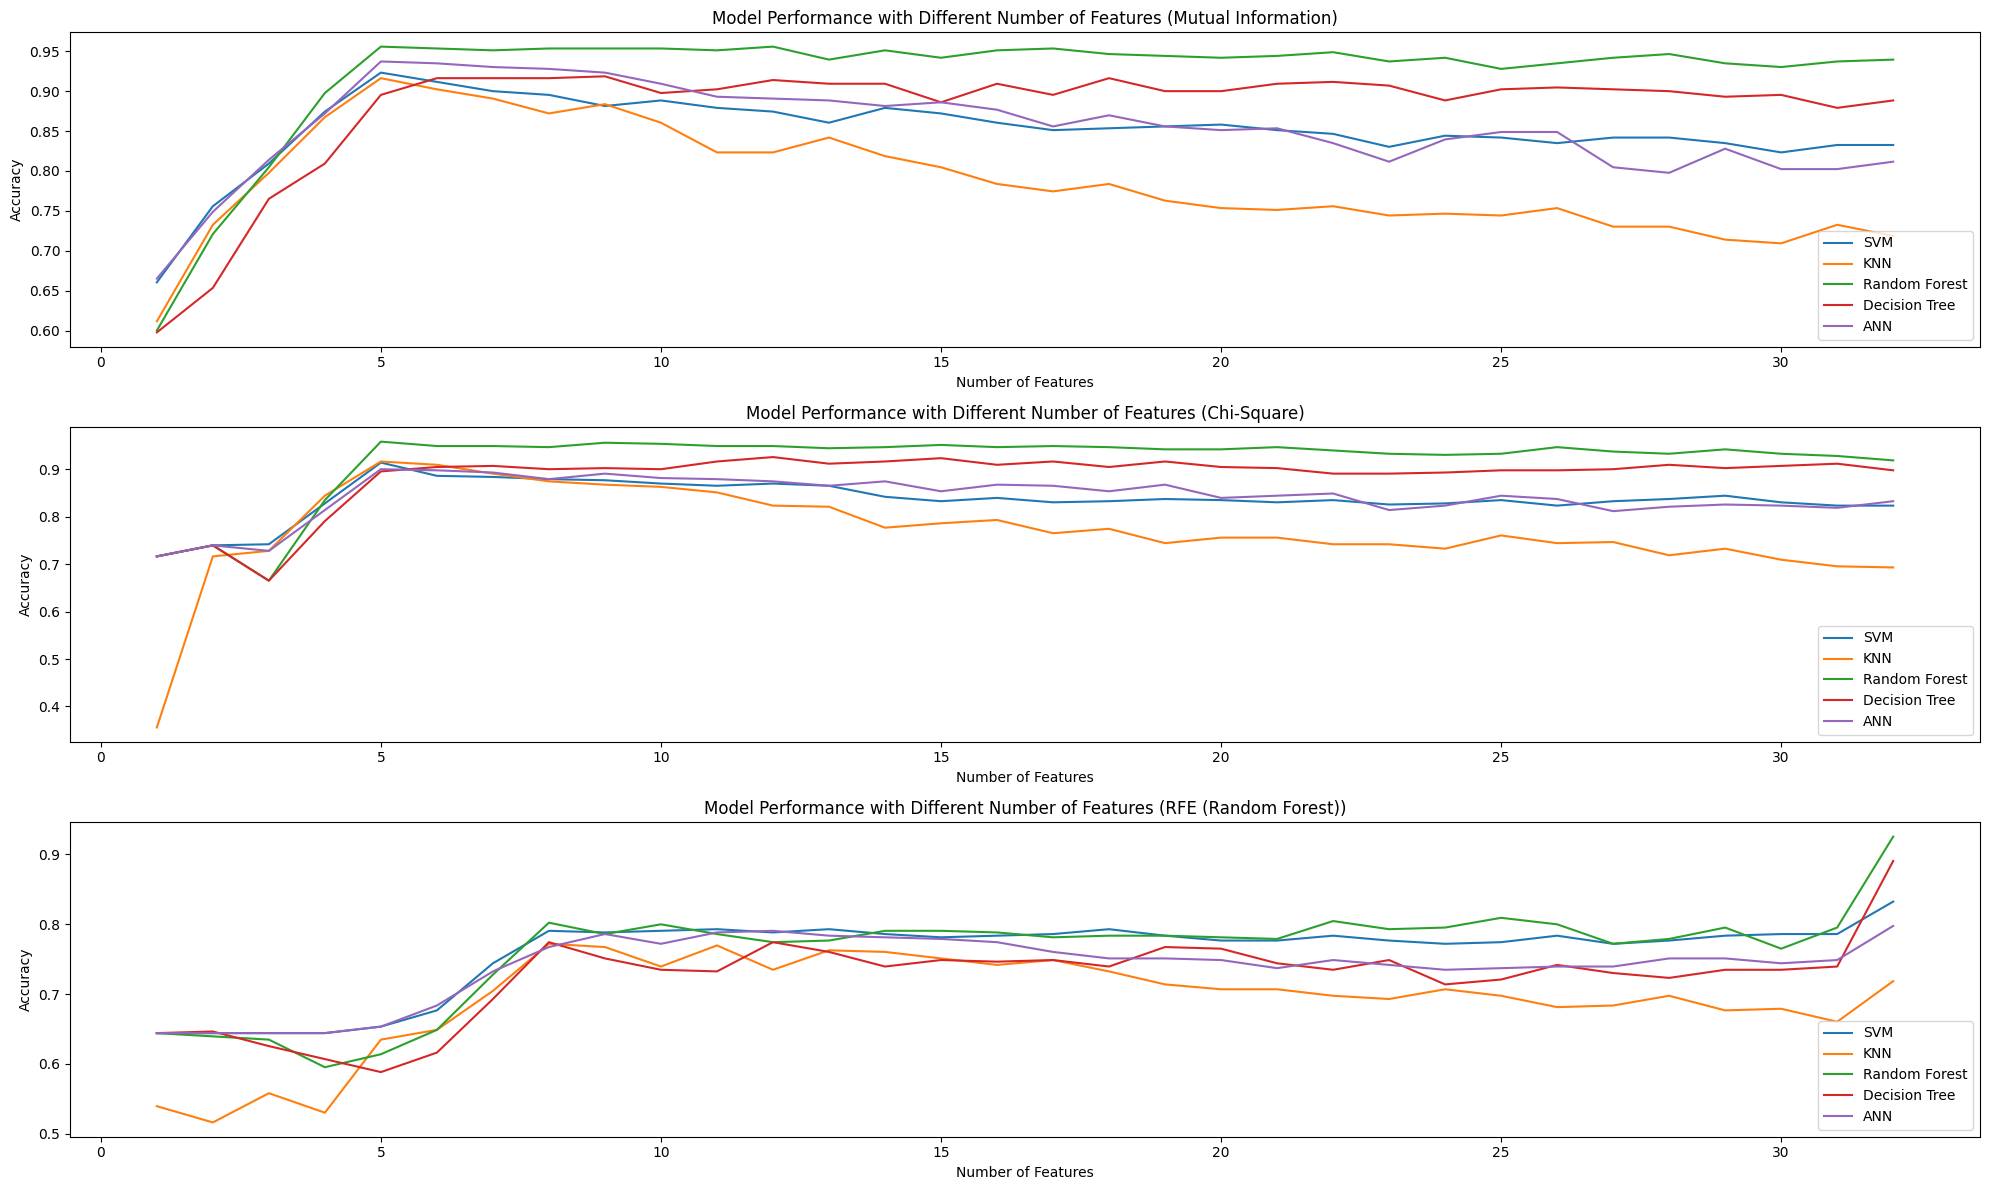

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Load and preprocess data
file_path = '/content/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['PatientID', 'DoctorInCharge'])

X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

num_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

def preprocess_data(scaler='standard'):
    if scaler == 'standard':
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_transformer_standard, num_cols),
                ('cat', cat_transformer, cat_cols)
            ])
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_transformer_minmax, num_cols),
                ('cat', cat_transformer, cat_cols)
            ])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    return X_train, X_test, y_train, y_test

feature_selectors = {
    "Mutual Information": mutual_info_classif,
    "Chi-Square": chi2,
    "RFE (Random Forest)": RandomForestClassifier(random_state=42)
}

classifiers = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42, max_iter=300)
}

results = {}
for fs_name, fs_algo in feature_selectors.items():
    if fs_name == "Chi-Square":
        X_train, X_test, y_train, y_test = preprocess_data(scaler='minmax')
    else:
        X_train, X_test, y_train, y_test = preprocess_data(scaler='standard')

    results[fs_name] = {name: [] for name in classifiers}

    if fs_name == "RFE (Random Forest)":
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=fs_algo, n_features_to_select=1)
        selector.fit(X_train, y_train)
        sorted_idx = selector.support_.argsort()
    else:
        selector = SelectKBest(score_func=fs_algo, k='all')
        selector.fit(X_train, y_train)
        sorted_idx = selector.scores_.argsort()[::-1]

    for i in range(1, X_train.shape[1] + 1):
        selected_features = sorted_idx[:i]
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]

        for name, model in classifiers.items():
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)
            results[fs_name][name].append(accuracy)
            print(f'Feature Selection: {fs_name}, Model: {name}, Number of Features: {i}, Accuracy: {accuracy:.4f}')

results_df = []
for fs_name, fs_results in results.items():
    for model_name, accuracies in fs_results.items():
        for num_features, accuracy in enumerate(accuracies, 1):
            results_df.append([fs_name, model_name, num_features, accuracy])

results_df = pd.DataFrame(results_df, columns=['Feature Selection', 'Model', 'Number of Features', 'Accuracy'])

print(results_df)

# Plot the results
plt.figure(figsize=(20, 12))
for fs_name, fs_results in results.items():
    plt.subplot(3, 1, list(results.keys()).index(fs_name) + 1)
    for model in fs_results:
        plt.plot(range(1, len(fs_results[model]) + 1), fs_results[model], label=model)
    plt.title(f'Model Performance with Different Number of Features ({fs_name})')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


## Kesimpulan

Algoritma Random Forest menjadi algoritma paling konsisten dan memiliki akurasi tinggi disandingkan dengan algoritma feature selection mutual information. Diikuti dengan chi-square dan RFE.

## Genetic Algorithms

Karena algoritma genetika berbeda dengan algoritma feature selection lain, jadi saya akan memperlakukan berbeda untuk agoritma ini dalam memprediksi kelas. Agar semuanya setara, akan saya mulai dari awal lagi.

In [14]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.3 MB/s eta 0:00:00


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
from deap import base, creator, tools, algorithms
import random

# Load and preprocess data
file_path = '/content/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['PatientID', 'DoctorInCharge'])

X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

num_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

def preprocess_data(scaler='standard'):
    if scaler == 'standard':
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_transformer_standard, num_cols),
                ('cat', cat_transformer, cat_cols)
            ])
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_transformer_minmax, num_cols),
                ('cat', cat_transformer, cat_cols)
            ])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    return X_train, X_test, y_train, y_test

def evaluate(individual, X_train, y_train, X_test, y_test, classifier):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0,  # Return 0 accuracy if no features are selected
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    classifier.fit(X_train_selected, y_train)
    y_pred = classifier.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),

def genetic_algorithm_feature_selection(X_train, X_test, y_train, y_test, classifier, num_generations=10, pop_size=20):
    num_features = X_train.shape[1]

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=classifier)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=pop_size)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)

    top_individual = tools.selBest(population, 1)[0]
    top_features = [i for i, bit in enumerate(top_individual) if bit == 1]
    return top_features

# Running the experiment
X_train, X_test, y_train, y_test = preprocess_data(scaler='standard')

classifiers = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42, max_iter=300)
}

ga_results = {}

for model_name, model in classifiers.items():
    print(f'Running GA for {model_name}...')
    selected_features = genetic_algorithm_feature_selection(X_train, X_test, y_train, y_test, model)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    ga_results[model_name] = accuracy
    print(f'Model: {model_name}, Selected Features: {len(selected_features)}, Accuracy: {accuracy:.4f}')

ga_results_df = pd.DataFrame(list(ga_results.items()), columns=['Model', 'Accuracy'])
print(ga_results_df)


Running GA for SVM...
Model: SVM, Selected Features: 11, Accuracy: 0.8791
Running GA for KNN...


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Model: KNN, Selected Features: 16, Accuracy: 0.8256
Running GA for Random Forest...


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Model: Random Forest, Selected Features: 18, Accuracy: 0.9512
Running GA for Decision Tree...


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Model: Decision Tree, Selected Features: 12, Accuracy: 0.9163
Running GA for ANN...


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimizati

Model: ANN, Selected Features: 11, Accuracy: 0.9070
           Model  Accuracy
0            SVM  0.879070
1            KNN  0.825581
2  Random Forest  0.951163
3  Decision Tree  0.916279
4            ANN  0.906977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-16-dcc78c69bd3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=ga_results_df, palette='viridis')


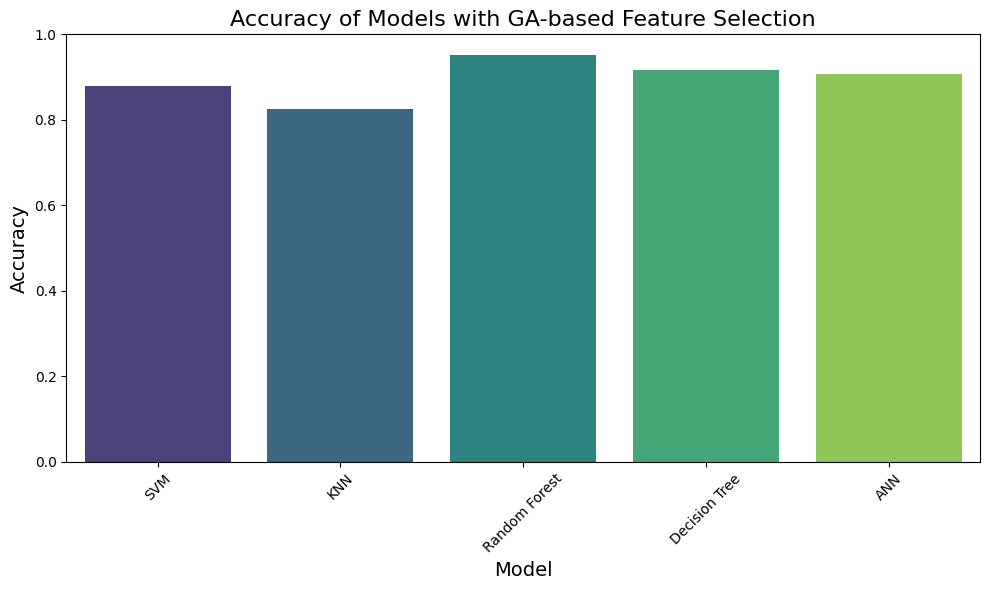

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the GA results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=ga_results_df, palette='viridis')

# Add labels and title
plt.title('Accuracy of Models with GA-based Feature Selection', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Show the plot
plt.tight_layout()
plt.show()


## Kesimpulan

Algoritma Genetika tidak jauh berbeda dengan algoritma MI dalam memilih fitur. Hasil menunjukkan bahwa random forest dengan algoritma genetika mecapai akurasi yang cukup tinggi yaitu 95%.